In [1]:
# 데이터 출처: https://archive.ics.uci.edu/dataset/222/bank+marketing
# Github 출처: https://github.com/uci-ml-repo/ucimlrepo

#기본 모듈 불러오기 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# warning을 모두 무시하는 것은 좋지 않으나 과제 수행을 쉽게할 수 있도록 무시설정
import warnings
warnings.filterwarnings(action='ignore')

개인과제 링크 : https://teamsparta.notion.site/747847f4a9c74eb58e815cdd1f6eeb2d

## 문제1: 라이브러리를 통해 데이터 불러오기
- 다음코드는 데이터를 불러오고 df 변수명에 저장하는 코드입니다.
- github 문서를 읽고 데이터를 요청하여 로컬환경에 저장해보세요

In [2]:
# !pip3 install -U ucimlrepo
import ucimlrepo

In [3]:
bm = ucimlrepo.fetch_ucirepo(name='Bank Marketing')
features = bm.data.features
targets = bm.data.targets

bank_marketing = pd.concat([features, targets], axis=1)
bank_marketing.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no


In [4]:
bank_marketing.to_csv('./data/bank_marketing.csv', index=False)

## 데이터 전처리 & EDA 간단히

In [5]:
#데이터 불러오기 
df = pd.read_csv('./data/bank_marketing.csv')

# 제공받은 데이터를 train, test로 분리
X = df.drop(columns = ['y'])
y = df[['y']]

# 학습과 평가를 위해 데이터 셋 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state= 42)
numeric_col = ['age','balance','day_of_week','duration','campaign','pdays','previous']
category_col = ['job','marital','education','default','housing','loan','contact','month','poutcome']

#분리된 데이터 차원 확인
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(33908, 16) (11303, 16) (33908, 1) (11303, 1)


In [6]:
X_train.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome
count,33908.000000,33688,33908,32522,33908,33908.000000,33908,33908,24180,33908.000000,33908,33908.000000,33908.000000,33908.000000,33908.000000,6153
unique,NaN,11,3,3,2,NaN,2,2,2,NaN,12,NaN,NaN,NaN,NaN,3
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,failure
freq,NaN,7369,20445,17376,33306,NaN,18891,28471,22000,NaN,10310,NaN,NaN,NaN,NaN,3645
mean,40.907957,NaN,NaN,NaN,NaN,1362.457709,NaN,NaN,NaN,15.825233,NaN,258.473015,2.759555,40.024979,0.582635,NaN
std,10.620338,NaN,NaN,NaN,NaN,3052.176471,NaN,NaN,NaN,8.339007,NaN,258.936344,3.094060,100.018015,2.445884,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN
25%,33.000000,NaN,NaN,NaN,NaN,74.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN
50%,39.000000,NaN,NaN,NaN,NaN,451.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1432.000000,NaN,NaN,NaN,21.000000,NaN,318.000000,3.000000,-1.000000,0.000000,NaN


In [7]:
X_test.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome
count,11303.000000,11235,11303,10832,11303,11303.00000,11303,11303,8011,11303.000000,11303,11303.000000,11303.000000,11303.000000,11303.000000,2099
unique,NaN,11,3,3,2,NaN,2,2,2,NaN,12,NaN,NaN,NaN,NaN,3
top,NaN,management,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,failure
freq,NaN,2417,6769,5826,11090,NaN,6239,9496,7285,NaN,3456,NaN,NaN,NaN,NaN,1256
mean,41.020968,NaN,NaN,NaN,NaN,1361.71512,NaN,NaN,NaN,15.749978,NaN,257.233301,2.776696,40.716358,0.573388,NaN
std,10.614053,NaN,NaN,NaN,NaN,3022.55985,NaN,NaN,NaN,8.272797,NaN,253.264401,3.109976,100.462846,1.810156,NaN
min,18.000000,NaN,NaN,NaN,NaN,-3372.00000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN
25%,33.000000,NaN,NaN,NaN,NaN,67.00000,NaN,NaN,NaN,8.000000,NaN,103.500000,1.000000,-1.000000,0.000000,NaN
50%,39.000000,NaN,NaN,NaN,NaN,439.00000,NaN,NaN,NaN,16.000000,NaN,179.000000,2.000000,-1.000000,0.000000,NaN
75%,49.000000,NaN,NaN,NaN,NaN,1406.50000,NaN,NaN,NaN,21.000000,NaN,322.000000,3.000000,-1.000000,0.000000,NaN


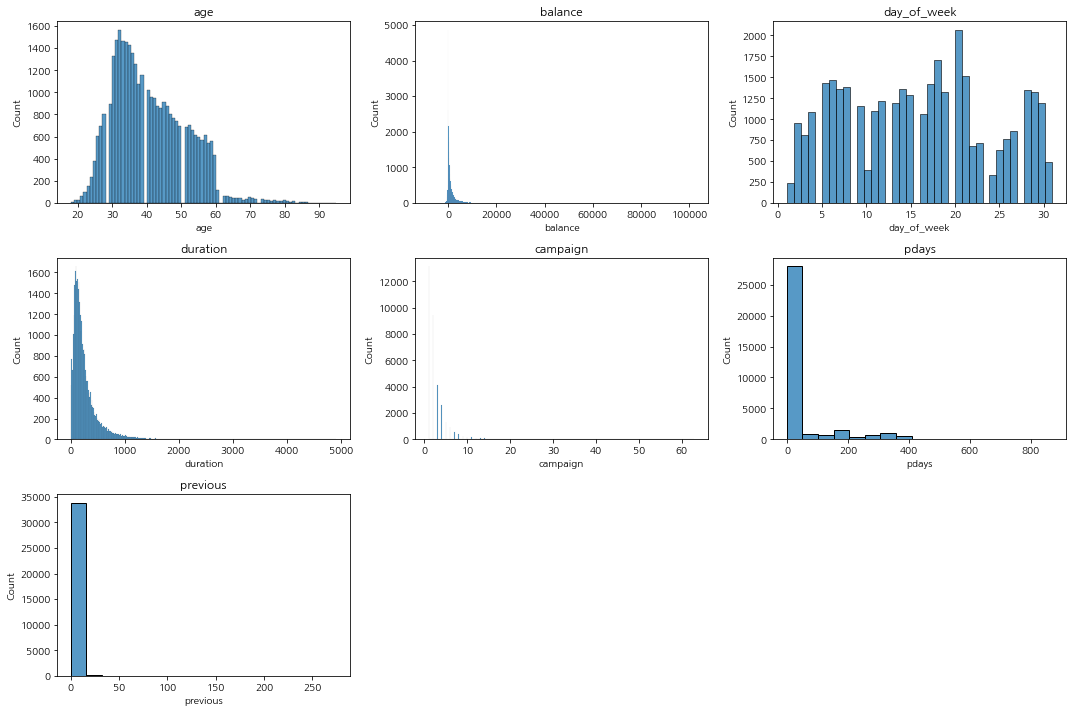

In [8]:
#수치형 변수 시각화
def get_3_hist(data:pd.DataFrame, columns:list):
    plt.figure(figsize=(15, 5 * (len(columns) // 3)))

    for i, col in enumerate(columns):
        # 서브플롯 위치 설정
        plt.subplot(len(columns) // 3 + (len(columns) % 3 > 0), 3, i + 1)
        # 히스토그램 그리기
        sns.histplot(data[col])
        plt.title(col)

    # 전체 그림 표시
    plt.tight_layout()
    plt.show()
    
get_3_hist(X_train, numeric_col)

In [9]:
# 이상치가 많은 컬럼에 대해서 로그스케일 적용

#balance 값 보정 - 음수 min값 보정 -> 0
balance_min = abs(min(X_train['balance'].min(), X_test['balance'].min()))
X_train['balance'] = X_train['balance'] + balance_min
X_test['balance'] = X_test['balance'] + balance_min

# 로그스케일 적용
for col in ['duration','balance','previous']:
    X_train[col] = np.log1p(X_train[col])
    X_test[col] = np.log1p(X_test[col])

In [10]:
X_train.describe()

,age,balance,day_of_week,duration,campaign,pdays,previous
count,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000
mean,40.907957,9.118624,15.825233,5.172125,2.759555,40.024979,0.225184
std,10.620338,0.214213,8.339007,0.922256,3.094060,100.018015,0.533092
min,18.000000,0.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,8.998878,8.000000,4.644391,1.000000,-1.000000,0.000000
50%,39.000000,9.044404,16.000000,5.198497,2.000000,-1.000000,0.000000
75%,48.000000,9.153982,21.000000,5.765191,3.000000,-1.000000,0.000000
max,95.000000,11.609571,31.000000,8.500861,63.000000,871.000000,5.620401


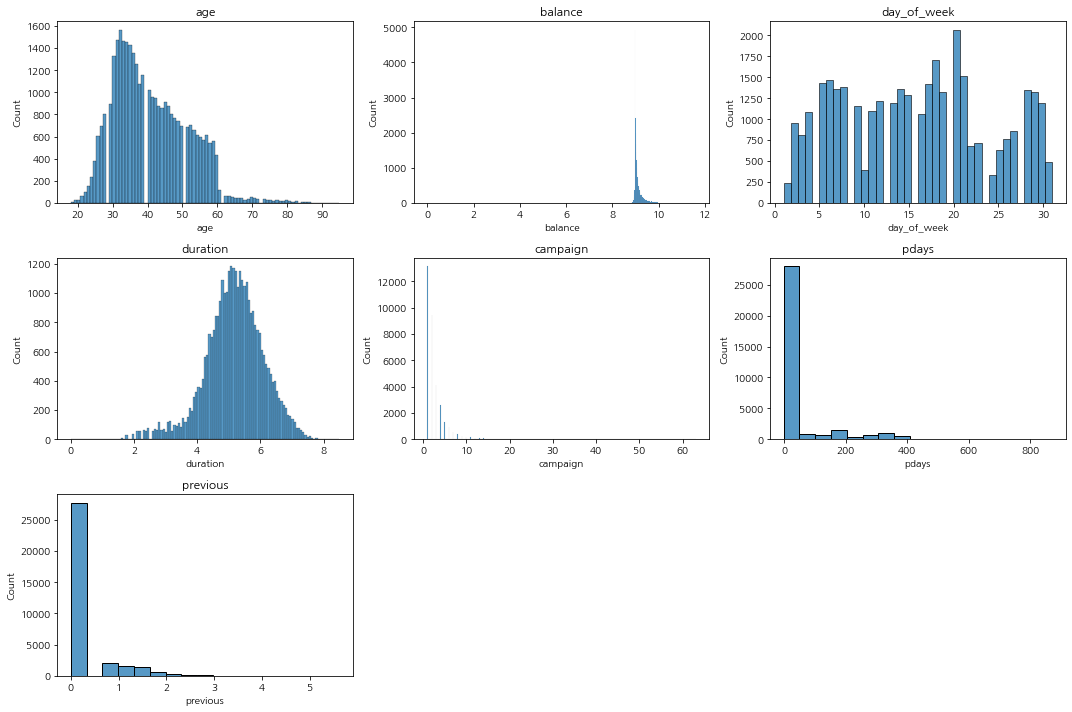

In [11]:
#로그스케일 변환 후 시각화
get_3_hist(X_train, numeric_col)

## 문제 2: Y 변수 인코딩 적용하기 
- Y 라벨을 no,yes를 사용자 정의함수와 apply를 이용하여 0,1로 인코딩 하세요
- 함수명은 get_binary로 설정하세요.
- Pandas docs: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html

In [12]:
# y_train label 분포 확인
y_train.value_counts().to_frame()

,0
y,
no,29941
yes,3967


In [13]:
# y_test label 분포 확인
y_test.value_counts().to_frame()

,0
y,
no,9981
yes,1322


In [14]:
def get_binary(x):
    if x=='no' : 
        return 0
    else : 
        return 1
        
# y_train 데이터 인코딩 코드
y_train['y'] = y_train['y'].apply(get_binary)

# y_test 데이터 인코딩코드
y_test['y'] = y_test['y'].apply(get_binary)

In [15]:
# 잘 적용되었는지 확인
print(y_train['y'].sum(), y_test['y'].sum())

3967 1322


## 문제3: 간단한 모델링 & 평가함수 생성하기
- 평가하기 위한 다음 함수를 완성하세요
- 필요한 모듈율 불러오고, 학습시키고, 결과를 저장하세요
    - y_pred_train : 훈련데이터 예측결과 변수
    - y_pred_test: 테스트데이터 예측결과 변수

In [16]:
def get_score(train:pd.DataFrame,  test:pd.DataFrame, x_var_list:list):
    #외부 전달인자를 내부변수에 할당
    X_train = train 
    X_test = test

    #일부 컬럼만 가져오기
    X_train = X_train[x_var_list]
    X_test = X_test[x_var_list]
    
    #모듈불러오기
    from xgboost import XGBClassifier
    from sklearn.metrics import accuracy_score, f1_score
    
    #모델가져오기 & 학습하기
    xgb_c = XGBClassifier(n_estimators=2000, max_depth=5, learning_rate=0.05, min_child_weight=1,
                          subsample=0.5, colsample_bytree=0.8, random_state=42)
    xgb_c.fit(X_train, y_train)
    
    # 학습하여 결과 저장
    y_pred_train = xgb_c.predict(X_train)
    y_pred_test = xgb_c.predict(X_test)
    
    #평가표 생성
    result = pd.DataFrame({'acc' : [accuracy_score(y_train, y_pred_train), accuracy_score(y_test, y_pred_test)],
                            'f1_score' : [f1_score(y_train, y_pred_train), f1_score(y_test, y_pred_test)]},
                            index = ['train','test'])
    
    display(result.round(2))

In [17]:
# duration 변수만 사용하여 결과내기
get_score(X_train, X_test, ['duration'])

,acc,f1_score
train,0.90,0.36
test,0.88,0.24


## 문제4: 모델링 수행하기
- 전체 변수를 가공하여 예측모델링을 수행하는 함수 get_numeric_sc를 완성해보세요

In [18]:
numeric_col

['age', 'balance', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous']

In [19]:
def get_numeric_sc(X_train:pd.DataFrame, X_test:pd.DataFrame):
    
    #StandardScaler 적용할 변수 리스트
    sc_col = ['pdays','previous']
    #MinMaxScaler 적용할 변수 리스트
    mm_col = ['age','duration','day_of_week','balance','campaign']
    
    #모듈 불러오기
    from sklearn.preprocessing import StandardScaler, MinMaxScaler
    
    #모델 가져오기
    sd_sc = StandardScaler()
    mm_sc = MinMaxScaler()

    #train, test 데이터변환(Standard Scaler이용)
    sd_sc.fit(X_train[sc_col])
    X_train[sc_col] = sd_sc.transform(X_train[sc_col])
    X_test[sc_col] = sd_sc.transform(X_test[sc_col])
    
    #train, test 데이터변환(MinMax Scaler이용)
    mm_sc.fit(X_train[mm_col])
    X_train[mm_col] = mm_sc.fit_transform(X_train[mm_col])
    X_test[mm_col] = mm_sc.fit_transform(X_test[mm_col])
    
    return X_train, X_test

X_train, X_test = get_numeric_sc(X_train, X_test)

In [20]:
X_train.describe()

,age,balance,day_of_week,duration,campaign,pdays,previous
count,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,3.390800e+04,3.390800e+04
mean,0.297506,0.785440,0.494174,0.608424,0.028380,1.592581e-17,-4.903474e-17
std,0.137926,0.018451,0.277967,0.108490,0.049904,1.000015e+00,1.000015e+00
min,0.000000,0.000000,0.000000,0.000000,0.000000,-4.101819e-01,-4.224173e-01
25%,0.194805,0.775126,0.233333,0.546344,0.000000,-4.101819e-01,-4.224173e-01
50%,0.272727,0.779047,0.500000,0.611526,0.016129,-4.101819e-01,-4.224173e-01
75%,0.389610,0.788486,0.666667,0.678189,0.032258,-4.101819e-01,-4.224173e-01
max,1.000000,1.000000,1.000000,1.000000,1.000000,8.308376e+00,1.012076e+01


In [21]:
# 수치형 변수를 이용한 학습&평가
get_score(X_train, X_test, numeric_col)

,acc,f1_score
train,0.96,0.78
test,0.87,0.30


In [22]:
category_col

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [23]:
def get_category(X_train:pd.DataFrame, X_test:pd.DataFrame):
    #범주형변수
    # 'job','marital','education','default','housing','loan','contact','month','poutcome'
    
    #범주형 컬럼 더미화 하기
    X_train_dummies = pd.get_dummies(X_train[category_col])
    X_test_dummies = pd.get_dummies(X_test[category_col])
    
    # 더미화한 변수를 기존 데이터셋에 합치기
    X_train = pd.concat([X_train, X_train_dummies], axis = 1)
    X_test = pd.concat([X_test, X_test_dummies], axis = 1)
    
    return X_train, X_test, X_train_dummies.columns.to_list()
    
X_train, X_test, col_dummies = get_category(X_train,X_test)

In [24]:
# 범주형 변수를 이용한 학습&평가
get_score(X_train,X_test, col_dummies)

,acc,f1_score
train,0.91,0.42
test,0.89,0.34


In [25]:
# 수치형 + 범주형 변수 모두 사용하여 평가
get_score(X_train, X_test, col_dummies + numeric_col)

,acc,f1_score
train,0.98,0.91
test,0.89,0.42


## 심화 (강의엔 없는내용)
- accuracy score는 높은 반면 f1-score는 낮습니다. 이걸로 볼때 y값이 편향되어있음을 알 수 있습니다.
    - 또한, f1-score는 train에는 100% 확률로 예측한 반면, test는 50% 정도로 터무니 없이 낮습니다. train 데이터에 과적합이 의심됩니다. 

- 이진분류(0,1) 문제는 기본적으로 한쪽으로 찍으면 50%의 확률이 나오기 때문에 50%의 결과는 기본만 못합니다.(비용, 시간 투입고려)
    - 게다가 파이차트로 확인해보니(하단) 대출거절이 기본적인 고객의 패턴입니다.(약 88%)
- 이를 극복하기 위해 y값이 편향되어 있는 문제 해결을 위해 y=1 인 데이터값을 증강하는  oversampling 방법을 수행해보겠습니다

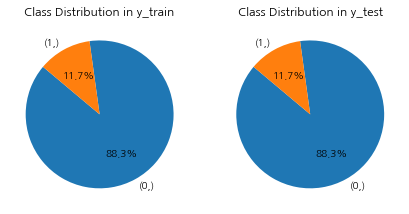

In [26]:
#train, test 데이터의 라벨 수 세기 

y_train_counts = y_train.value_counts()
y_test_counts = y_test.value_counts()

datasets = [(y_train, 'Class Distribution in y_train'),
            (y_test, 'Class Distribution in y_test')]

# subplot 생성
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6, 3))

# 반복문을 사용하여 각 데이터셋의 클래스 분포 시각화
for i, (dataset, title) in enumerate(datasets):
    value_counts = dataset.value_counts()
    axes[i].pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
    axes[i].set_title(title)

# 그래프 보여주기
plt.tight_layout()
plt.show()

In [28]:
#데이터다시 불러오기
df = pd.read_csv('./data/bank_marketing.csv')
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state= 42)

#y 라벨 변경
y_train['y'] = y_train['y'].apply(get_binary)
y_test['y'] = y_test['y'].apply(get_binary)

#처음 순서와 다르게 범주형 먼저 인코딩 하여 숫자로 변경
#이유: SMOTE 알고리즘이 기본적으로 수치형변수에 적용되기 때문
X_train, X_test, col_dummies = get_category(X_train,X_test)

# 사용된 범주형 변수는 삭제 
X_train = X_train.drop(columns = category_col)
X_test = X_test.drop(columns = category_col)

- SMOTE 알고리즘을 통한 oversampling 적용

In [29]:
#최초 1회 실행 후 주석처리
#pip install imbalanced-learn

In [30]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)
X_test, y_test = sm.fit_resample(X_test, y_test)

- 하기 내용은 이전과 같음

In [31]:
#balance의 값은 음수가 있기 때문에 최소값을 보정함
balance_min = abs(min(X_train['balance'].min(), X_test['balance'].min()))
X_train['balance'] = X_train['balance'] + balance_min
X_test['balance'] = X_test['balance'] + balance_min

# 로그스케일 적용
for col in ['balance','previous']:
    X_train[col] = np.log1p(X_train[col])
    X_test[col] = np.log1p(X_test[col])
    
# 수치형 변수 변환
X_train, X_test = get_numeric_sc(X_train, X_test)

In [32]:
get_score(X_train, X_test, col_dummies + numeric_col)

,acc,f1_score
train,0.99,0.99
test,0.93,0.93


# (선택, 서술형)

- 위 모델링은 데이터 전처리 등 개선할 점이 있습니다. 어떤 부분을 개선하면 좋을까요? 

- **이상치에 대한 전처리를 로그스케일링만 한 상태에서 분석을 진행하였다.**
    - z-score나 IQR 기준으로 이상치를 판정하여 상한, 하한치로 대체했다면 좀 더 일반화 가능성이 높았을 수도 있다.
- **결측치에 대한 전처리를 하지 않은 상태에서 분석을 진행하였다**
    - 범주형 변수인 job, education, contact, poutcome 변수에 대해서 최빈치 대치나, KNN 보간 등의 전처리를 한 뒤에 수행하는 편이 더 나앗을 것이라고 생각한다. 
    - 물론 poutcome의 경우 결측치가 전체 데이터의 80%로 상당히 많기 때문에 변수를 사용하지 않는 것도 고려해볼만 하다고 생각한다.
- **Train, Test set말고도 데이터를 더 분할하여 Validation Set을 만들어 학습을 진행했다면 과적합을 감소시키고 일반화 가능성을 좀 더 높일 수 있었을 것이라고 생각한다.**